In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors
import cv2

In [2]:
# images saved as BGR format
path = "G:\Meine Ablage\Images_AI_Project\zwiebel_jpg\zwiebel_39.jpg"
onion = cv2.imread(path.replace("\\","/"))
onion = cv2.cvtColor(onion, cv2.COLOR_BGR2RGB)

path = "G:\Meine Ablage\Images_AI_Project\karotte_jpg\karotte_(221).jpg"
carrot = cv2.imread(path.replace("\\","/"))
carrot = cv2.cvtColor(carrot, cv2.COLOR_BGR2RGB)

path = "G:\Meine Ablage\Images_AI_Project\kartoffel_jpg\kartoffel_(207).jpg"
potato = cv2.imread(path.replace("\\","/"))
potato = cv2.cvtColor(potato, cv2.COLOR_BGR2RGB)


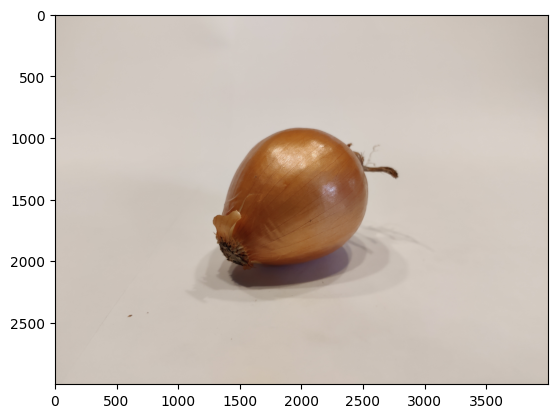

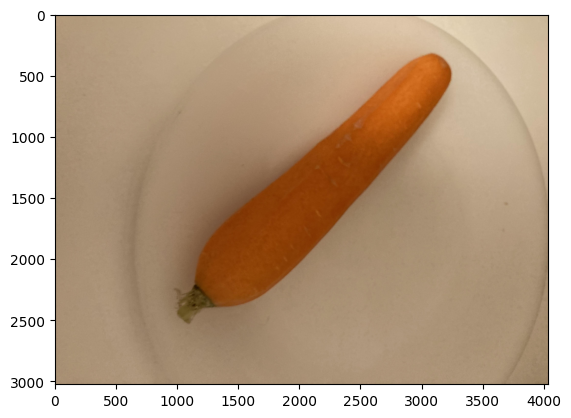

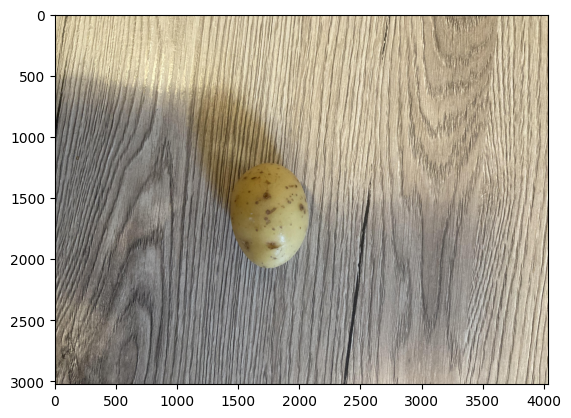

In [8]:
show_image_plt(onion)
show_image_plt(carrot)
show_image_plt(potato)

In [3]:
path = "G:\Meine Ablage\Images_AI_Project\karotte_jpg"
carrot = plt.imread(path.replace("\\","/")+"/karotte_(221).jpg")
carrot.shape



(3024, 4032, 3)

In [4]:
def show_image_plt(img):
    #rgb_carrot = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [5]:
def show_image(img):
    cv2.imshow("Image", img)
    cv2.waitKey(0)
    

In [6]:
def resize_image(vegi):
    height, width, c = vegi.shape
    new_height = 100
    ratio = new_height / height 
    new_width = int(width * ratio)
    dimensions = (new_width, new_height)
    print(dimensions)
    resized_img = cv2.resize(vegi, dimensions, interpolation=cv2.INTER_LINEAR)
    print("New shape:      ", resized_img.shape)


    return resized_img

In [7]:
def resize_to_square(vegi):
    img_size = 128
    height, width = vegi.shape[:2]
    a1 = width / height
    a2 = height / width

    if (a1 > a2):
        r_img = cv2.resize(vegi, (round(img_size * a1), img_size), interpolation = cv2.INTER_AREA)
        margin = int(r_img.shape[1]/6)
        crop_img = r_img[0:img_size, margin:(margin+img_size)]

    elif(a1 < a2):
        # if height greater than width
        r_img = cv2.resize(vegi, (img_size, round(img_size * a2)), interpolation = cv2.INTER_AREA)
        margin = int(r_img.shape[0]/6)
        crop_img = r_img[margin:(margin+img_size), 0:img_size]

    elif(a1 == a2):
        # if height and width are equal
        r_img = cv2.resize(vegi, (img_size, round(img_size * a2)), interpolation = cv2.INTER_AREA)
        crop_img = r_img[0:img_size, 0:img_size]

    if(crop_img.shape[0] != img_size or crop_img.shape[1] != img_size):
        crop_img = r_img[0:img_size, 0:img_size]

    return crop_img


Size:  (128, 128, 3)


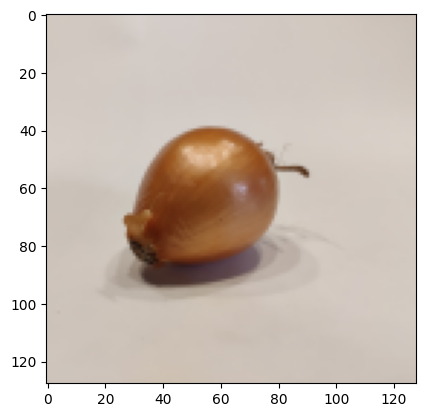

Size:  (128, 128, 3)


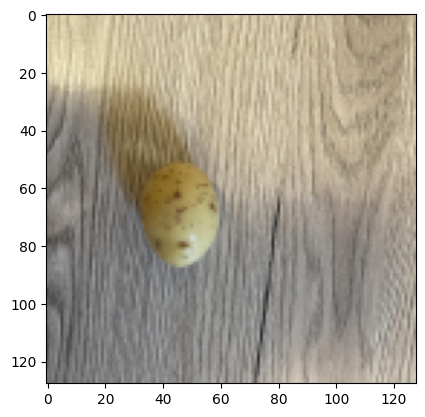

In [8]:
square_onion = resize_to_square(onion)
print("Size: ", square_onion.shape)
show_image_plt(square_onion)

square_potato = resize_to_square(potato)
print("Size: ", square_potato.shape)
show_image_plt(square_potato)

In [12]:
original = square_onion.copy()
gray_square_onion = cv2.cvtColor(square_onion, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray_square_onion, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(square_onion, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]



-1

In [26]:
result = square_onion.copy()
gray_square_onion = cv2.cvtColor(square_onion, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray_square_onion, 200,255, cv2.THRESH_BINARY)[1]

# get contours

contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
    print("x,y,w,h:",x,y,w,h)


show_image(result)


x,y,w,h: 103 109 1 1
x,y,w,h: 23 78 5 4
x,y,w,h: 83 76 3 1
x,y,w,h: 25 76 2 1
x,y,w,h: 25 73 2 2
x,y,w,h: 53 49 1 1
x,y,w,h: 61 48 1 1
x,y,w,h: 110 13 1 1
x,y,w,h: 0 0 128 116


In [51]:

img = square_onion.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,100,200)

show_image(edges)

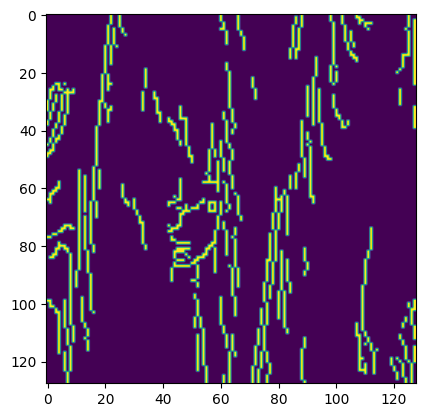

In [110]:
img_3 = square_potato.copy()
show_image(img_3)
img_gray = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,100,200)

show_image_plt(edges)

https://realpython.com/python-opencv-color-spaces/

(128, 128, 3)


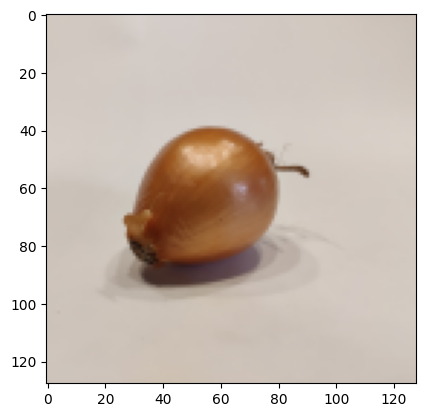

In [9]:
img_rgb = square_onion.copy()
#height, width
print(img_rgb.shape)
show_image_plt(img_rgb)




(128, 128, 3)


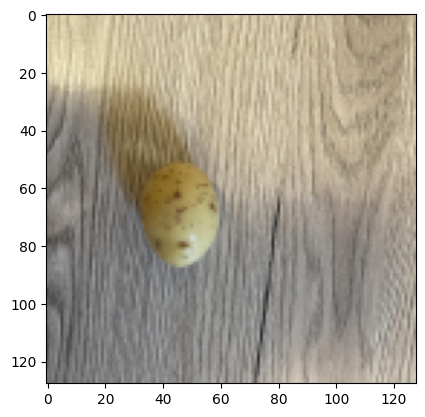

In [10]:
img_rgb_po = square_potato.copy()
#height, width
print(img_rgb_po.shape)
show_image_plt(img_rgb_po)

In [112]:
print(f"rgb values: \n {img_rgb[120:122, :10]}")

rgb values: 
 [[[206 197 188]
  [206 197 188]
  [206 197 188]
  [206 197 188]
  [206 196 187]
  [206 196 187]
  [205 195 186]
  [205 196 187]
  [205 195 186]
  [205 195 186]]

 [[206 196 187]
  [207 197 188]
  [206 196 187]
  [206 196 187]
  [206 196 187]
  [205 196 187]
  [205 196 187]
  [205 196 187]
  [206 196 187]
  [205 196 187]]]


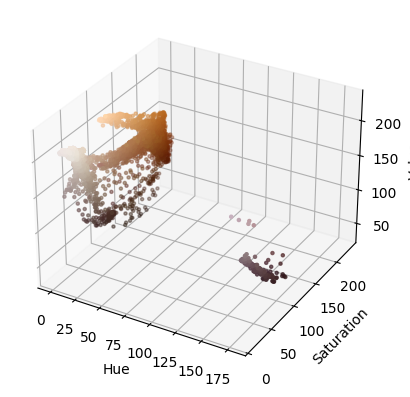

In [113]:
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

pixel_colors = img_rgb.reshape((np.shape(img_rgb)[0]*np.shape(img_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [114]:
i = 0
for row in range(0, hsv_img.shape[1]):
    for col in range(0, hsv_img.shape[1]):
        print(f"Row {row}: Spalte {col} {hsv_img[row, col]}")
    
    

Row 0: Spalte 0 [ 14  21 210]
Row 0: Spalte 1 [ 13  19 210]
Row 0: Spalte 2 [ 13  19 210]
Row 0: Spalte 3 [ 13  19 210]
Row 0: Spalte 4 [ 13  19 210]
Row 0: Spalte 5 [ 14  21 210]
Row 0: Spalte 6 [ 14  21 210]
Row 0: Spalte 7 [ 14  21 210]
Row 0: Spalte 8 [ 14  21 210]
Row 0: Spalte 9 [ 13  19 210]
Row 0: Spalte 10 [ 13  20 209]
Row 0: Spalte 11 [ 13  20 209]
Row 0: Spalte 12 [ 13  20 209]
Row 0: Spalte 13 [ 13  20 209]
Row 0: Spalte 14 [ 13  20 209]
Row 0: Spalte 15 [ 13  20 209]
Row 0: Spalte 16 [ 13  20 209]
Row 0: Spalte 17 [ 13  20 209]
Row 0: Spalte 18 [ 13  20 209]
Row 0: Spalte 19 [ 14  21 210]
Row 0: Spalte 20 [ 13  19 210]
Row 0: Spalte 21 [ 13  19 210]
Row 0: Spalte 22 [ 13  19 211]
Row 0: Spalte 23 [ 16  18 211]
Row 0: Spalte 24 [ 16  18 212]
Row 0: Spalte 25 [ 14  16 212]
Row 0: Spalte 26 [ 15  17 213]
Row 0: Spalte 27 [ 14  15 214]
Row 0: Spalte 28 [ 15  14 214]
Row 0: Spalte 29 [ 14  15 215]
Row 0: Spalte 30 [ 14  15 215]
Row 0: Spalte 31 [ 10  14 216]
Row 0: Spalte 32 [

MASK,  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


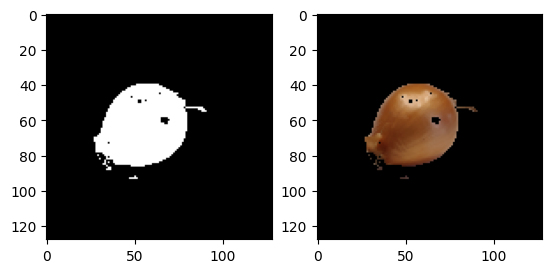

In [129]:
border_light = (0, 80, 75) #20, 80, 50
border_dark = (20, 230, 255) #40, 214, 220
#15, 23, 135
mask = cv2.inRange(hsv_img, border_light, border_dark)
result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
print("MASK, ", mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

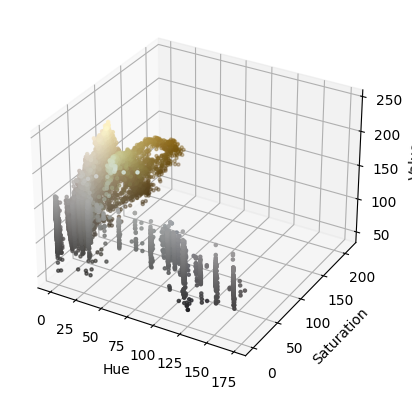

In [12]:
hsv_img_po = cv2.cvtColor(img_rgb_po, cv2.COLOR_RGB2HSV)

pixel_colors = img_rgb_po.reshape((np.shape(img_rgb_po)[0]*np.shape(img_rgb_po)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

h, s, v = cv2.split(hsv_img_po)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [25]:
hue = 0
sat = 0
val = 0
counter = 0
for row in range(0, 11):
    for col in range(0, hsv_img_po.shape[1]):
        #print(f"Row {row}: Spalte {col} {hsv_img_po[row, col]}")
        hue_temp, sat_temp, val_temp = hsv_img_po[row, col]
        hue += hue_temp
        sat += sat_temp
        val += val_temp
        counter += 1
print(hue, sat, val)
hue_h = 0
sat_h = 0
val_h = 0
counter_2 = 0
for row in range(40, 80):
    for col in range(30, 60):
        hue_temp, sat_temp, val_temp = hsv_img_po[row, col]
        hue_h += hue_temp
        sat_h += sat_temp
        val_h += val_temp
        counter_2 += 1
        
print("C1: ", counter)
print("C2: ", counter_2)
print(hue_h, sat_h, val_h)
border_low = (int(hue/(11*128)), int(sat/(11*128)), int(val/(11*128)))
print(border_low)
border_high = (int(hue_h/(40*30)), int(sat_h/(40*30)), int(val_h/(40*30)))
print(border_high)

28527 81874 280329
40 30
40 31
40 32
40 33
40 34
40 35
40 36
40 37
40 38
40 39
40 40
40 41
40 42
40 43
40 44
40 45
40 46
40 47
40 48
40 49
40 50
40 51
40 52
40 53
40 54
40 55
40 56
40 57
40 58
40 59
41 30
41 31
41 32
41 33
41 34
41 35
41 36
41 37
41 38
41 39
41 40
41 41
41 42
41 43
41 44
41 45
41 46
41 47
41 48
41 49
41 50
41 51
41 52
41 53
41 54
41 55
41 56
41 57
41 58
41 59
42 30
42 31
42 32
42 33
42 34
42 35
42 36
42 37
42 38
42 39
42 40
42 41
42 42
42 43
42 44
42 45
42 46
42 47
42 48
42 49
42 50
42 51
42 52
42 53
42 54
42 55
42 56
42 57
42 58
42 59
43 30
43 31
43 32
43 33
43 34
43 35
43 36
43 37
43 38
43 39
43 40
43 41
43 42
43 43
43 44
43 45
43 46
43 47
43 48
43 49
43 50
43 51
43 52
43 53
43 54
43 55
43 56
43 57
43 58
43 59
44 30
44 31
44 32
44 33
44 34
44 35
44 36
44 37
44 38
44 39
44 40
44 41
44 42
44 43
44 44
44 45
44 46
44 47
44 48
44 49
44 50
44 51
44 52
44 53
44 54
44 55
44 56
44 57
44 58
44 59
45 30
45 31
45 32
45 33
45 34
45 35
45 36
45 37
45 38
45 39
45 40
45 41
45 42
45 

MASK,  [[  0   0   0 ... 255   0 255]
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255   0 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


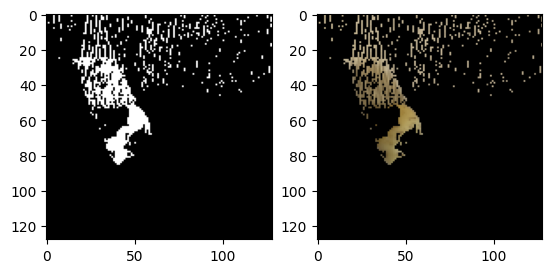

In [29]:
border_light = (0, 80, 75) #20, 80, 50
border_dark = (20, 230, 255) #40, 214, 220
bo_l = (20, 58, 100)
bo_h = (24, 160, 200)
#15, 23, 135
mask_1 = cv2.inRange(hsv_img_po, bo_l, bo_h)
result_1 = cv2.bitwise_and(img_rgb_po, img_rgb_po, mask=mask_1)
print("MASK, ", mask_1)
plt.subplot(1, 2, 1)
plt.imshow(mask_1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result_1)
plt.show()

The Code below is for data augmentation. It is a technique for enlarging a dataset.
It will use the standard techniques like horizontal & vertical flipping and rotation.

Load Images from personal cloud storage

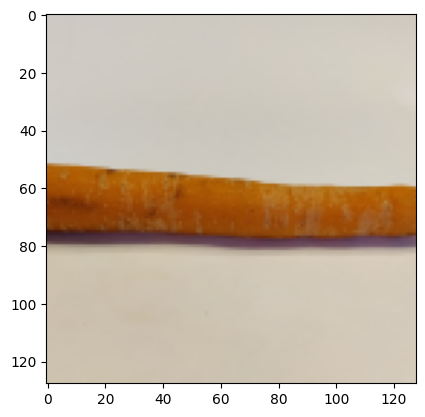

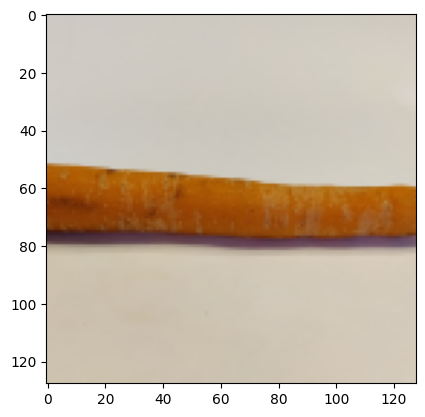

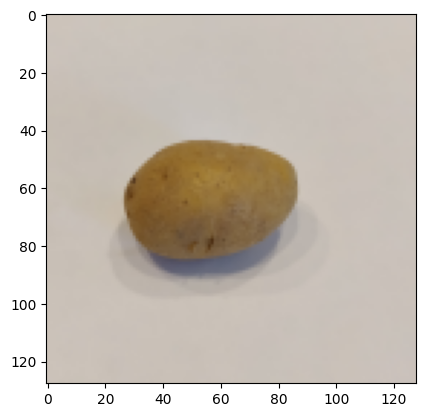

In [91]:
path = "G:\Meine Ablage\Images_AI_Project\zwiebel_jpg\zwiebel_39.jpg"
#onion = cv2.imread(path.replace("\\","/"))
#onion = cv2.cvtColor(onion, cv2.COLOR_BGR2RGB)

path = "G:\Meine Ablage\Images_AI_Project\karotte_jpg\karotte_46.jpg"
onion = cv2.imread(path.replace("\\","/"))
onion = cv2.cvtColor(onion, cv2.COLOR_BGR2RGB)
#carrot = cv2.imread(path.replace("\\","/"))
#carrot = cv2.cvtColor(carrot, cv2.COLOR_BGR2RGB)

path = "G:\Meine Ablage\Images_AI_Project\kartoffel_jpg\kartoffel_122.jpg"
potato = cv2.imread(path.replace("\\","/"))
potato = cv2.cvtColor(potato, cv2.COLOR_BGR2RGB)

onion_sq = resize_to_square(onion)
carrot_sq = resize_to_square(carrot)
potato_sq = resize_to_square(potato)

show_image_plt(onion_sq)
show_image_plt(carrot_sq)
show_image_plt(potato_sq)

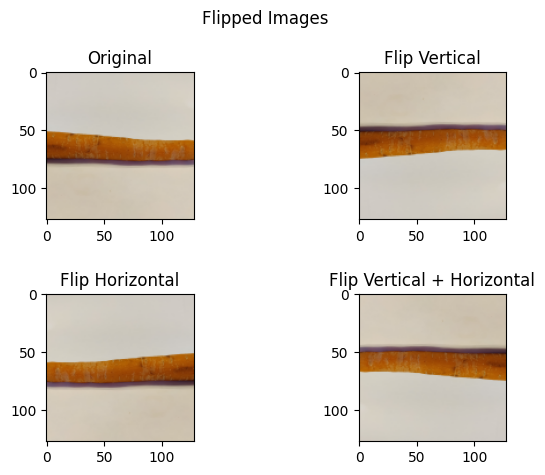

In [92]:
# flip vertical
onion_sq_v = cv2.flip(onion_sq, 0)
#show_image_plt(onion_sq_v)

#flip horizontal
onion_sq_h = cv2.flip(onion_sq, 1)
#show_image_plt(onion_sq_h)

#flip vertical + horizontal
onion_sq_vh = cv2.flip(onion_sq, -1)
#show_image_plt(onion_sq_vh)

fig, axarr = plt.subplots(2, 2) #1 row, 3 cols
fig.tight_layout(h_pad=4)
axarr[0][0].imshow(onion_sq)
axarr[0][0].set_title("Original")
axarr[0][1].imshow(onion_sq_v)
axarr[0][1].set_title("Flip Vertical")
axarr[1][0].imshow(onion_sq_h)
axarr[1][0].set_title("Flip Horizontal")
axarr[1][1].imshow(onion_sq_vh)
axarr[1][1].set_title("Flip Vertical + Horizontal")
fig.suptitle('Flipped Images')
plt.subplots_adjust(top = 0.85)

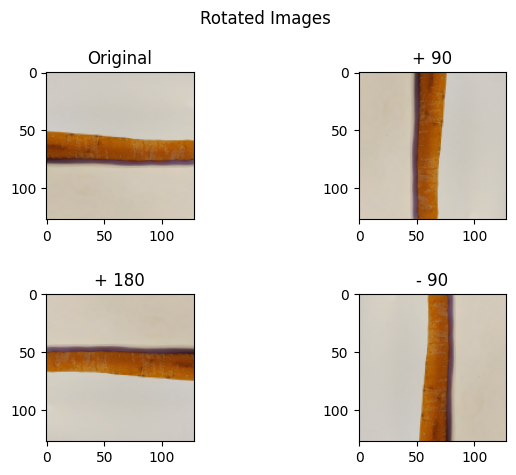

In [93]:
# rotate 90 degree clockwise
onion_sq_r90 = cv2.rotate(onion_sq, cv2.ROTATE_90_CLOCKWISE)
#show_image_plt(onion_sq_v)

#rotate 180 degree
onion_sq_r180 = cv2.rotate(onion_sq, cv2.ROTATE_180)
#show_image_plt(onion_sq_h)

#rotate 90 degree counterclockwise
onion_sq_rc90 = cv2.rotate(onion_sq, cv2.ROTATE_90_COUNTERCLOCKWISE)
#show_image_plt(onion_sq_vh)

fig, axarr = plt.subplots(2, 2) #2 row, 2 cols
fig.tight_layout(h_pad=4)

axarr[0][0].imshow(onion_sq)
axarr[0][0].set_title("Original")
axarr[0][1].imshow(onion_sq_r90)
axarr[0][1].set_title("+ 90")
axarr[1][0].imshow(onion_sq_r180)
axarr[1][0].set_title("+ 180")
axarr[1][1].imshow(onion_sq_rc90)
axarr[1][1].set_title("- 90")

fig.suptitle('Rotated Images')
plt.subplots_adjust(top = 0.85)



In [106]:
def draw_bounding_box(img, low, high):    
    result = img.copy()
    gray_square_onion = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    thresh = cv2.threshold(gray_square_onion, low, high, cv2.THRESH_BINARY)[1]

    # get contours
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if w > 22 and h > 0.5:
            cv2.rectangle(result, (x, y), (x+w, y+h), (100, 0, 255), 2)
            print("x,y,w,h:",x,y,w,h)
        else:
            continue
    show_image_plt(result)

In [95]:
gray_square_onion = cv2.cvtColor(onion_sq, cv2.COLOR_RGB2GRAY)

Row 0: Spalte 0 202
Row 0: Spalte 1 202
Row 0: Spalte 2 202
Row 0: Spalte 3 202
Row 0: Spalte 4 201
Row 0: Spalte 5 201
Row 0: Spalte 6 201
Row 0: Spalte 7 202
Row 0: Spalte 8 201
Row 0: Spalte 9 201
Row 0: Spalte 10 202
Row 0: Spalte 11 202
Row 0: Spalte 12 202
Row 0: Spalte 13 202
Row 0: Spalte 14 202
Row 0: Spalte 15 202
Row 0: Spalte 16 202
Row 0: Spalte 17 202
Row 0: Spalte 18 202
Row 0: Spalte 19 202
Row 0: Spalte 20 201
Row 0: Spalte 21 201
Row 0: Spalte 22 202
Row 0: Spalte 23 202
Row 0: Spalte 24 202
Row 0: Spalte 25 202
Row 0: Spalte 26 202
Row 0: Spalte 27 202
Row 0: Spalte 28 202
Row 0: Spalte 29 202
Row 0: Spalte 30 201
Row 0: Spalte 31 201
Row 0: Spalte 32 202
Row 0: Spalte 33 202
Row 0: Spalte 34 202
Row 0: Spalte 35 202
Row 0: Spalte 36 202
Row 0: Spalte 37 202
Row 0: Spalte 38 201
Row 0: Spalte 39 202
Row 0: Spalte 40 201
Row 0: Spalte 41 201
Row 0: Spalte 42 201
Row 0: Spalte 43 202
Row 0: Spalte 44 201
Row 0: Spalte 45 202
Row 0: Spalte 46 202
Row 0: Spalte 47 201
Ro

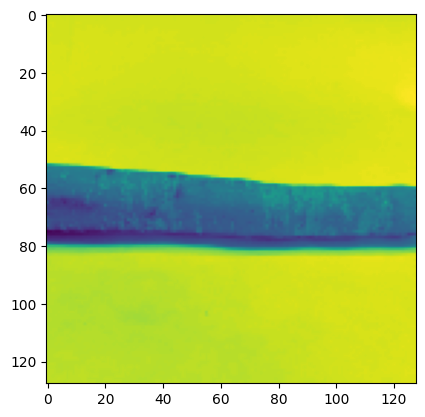

In [96]:
gray_square_onion = cv2.cvtColor(onion_sq, cv2.COLOR_RGB2GRAY)
for row in range(0, gray_square_onion.shape[1]):
    for col in range(0, gray_square_onion.shape[1]):
        print(f"Row {row}: Spalte {col} {gray_square_onion[row, col]}")
show_image_plt(gray_square_onion)


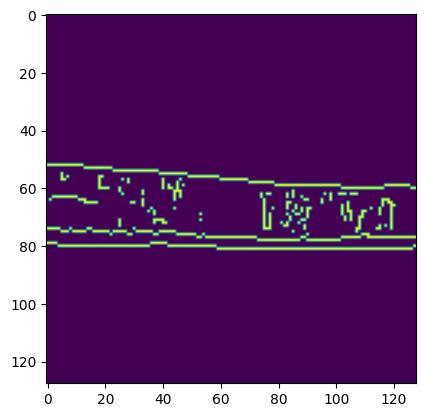

error: OpenCV(4.8.1) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xd8611878::Set<1,-1,-1>,struct cv::impl::A0xd8611878::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [97]:
#draw_bounding_box(onion_sq, 150, 255)
cpy_onion_sq = onion_sq.copy()
edges = cv2.Canny(cpy_onion_sq,100,105)
show_image_plt(edges)

draw_bounding_box(edges, 150, 255)

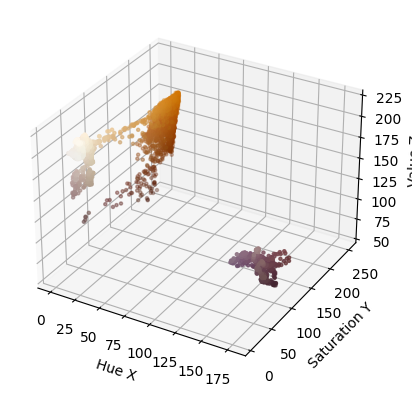

In [98]:
onion_rgb = onion_sq.copy()
onion_hsv = cv2.cvtColor(onion_rgb, cv2.COLOR_RGB2HSV)

pixel_colors = onion_rgb.reshape((np.shape(onion_rgb)[0]*np.shape(onion_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

h, s, v = cv2.split(onion_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue X")
axis.set_ylabel("Saturation Y")
axis.set_zlabel("Value Z")
plt.show()

In [99]:
onion_hsv[60][40]

array([ 16, 230, 171], dtype=uint8)

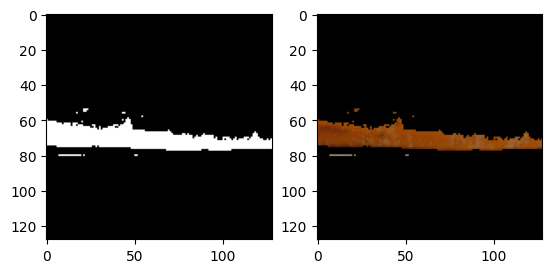

In [100]:
border_light = (8, 50, 75) #20, 80, 50
border_dark = (15, 255, 160) #40, 214, 220
#15, 23, 135
mask = cv2.inRange(onion_hsv, border_light, border_dark)
result = cv2.bitwise_and(onion_rgb, onion_rgb, mask= )


plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [116]:
#result_hsv = cv2.cvtColor(result, cv2.COLOR_RGB2HSV)
#result[70][:]
onion_sq[62][:]

array([[151,  67,   4],
       [151,  68,   5],
       [152,  69,   4],
       [154,  72,   5],
       [156,  72,   5],
       [154,  71,   4],
       [155,  73,   5],
       [156,  75,   5],
       [156,  74,   5],
       [162,  82,  12],
       [155,  72,   5],
       [156,  73,   5],
       [157,  75,   5],
       [156,  75,   5],
       [163,  86,  12],
       [160,  80,  10],
       [157,  75,   4],
       [160,  78,   5],
       [169,  95,  21],
       [163,  84,  11],
       [162,  79,   6],
       [164,  82,   6],
       [166,  82,   5],
       [166,  83,   5],
       [166,  83,   6],
       [162,  79,   5],
       [166,  95,  25],
       [167,  96,  22],
       [172, 101,  24],
       [167,  90,  11],
       [168,  85,   5],
       [168,  83,   4],
       [167,  82,   4],
       [169,  89,  11],
       [177, 108,  31],
       [165,  87,  10],
       [168,  89,  12],
       [164,  82,   6],
       [163,  82,   6],
       [167,  87,  12],
       [164,  84,   9],
       [171, 101

x,y,w,h: 0 59 128 19


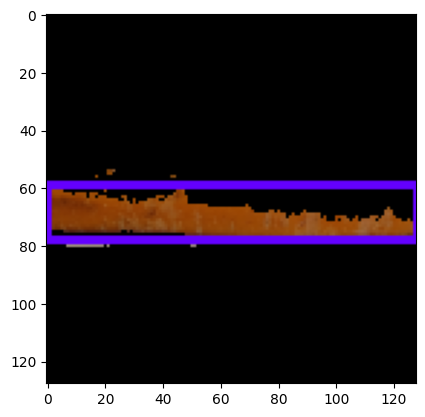

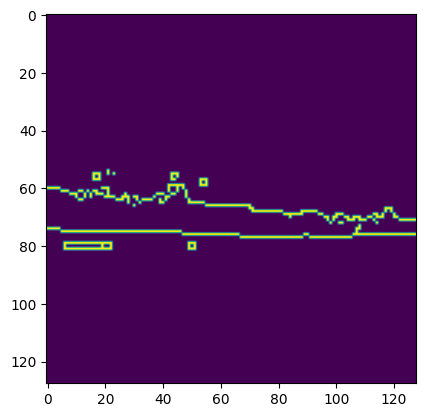

In [108]:
draw_bounding_box(result, 0, 255)

edges = cv2.Canny(result, 255/3, 255)
show_image_plt(edges)